In [17]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
age = pd.read_csv("./dataset/enter_korea/Enter_korea_by_age.csv")
gender = pd.read_csv("./dataset/enter_korea/Enter_korea_by_gender.csv")
purpose = pd.read_csv("./dataset/enter_korea/Enter_korea_by_purpose.csv")

In [19]:
# df.head()
# df.info()
# df.describe()
# df.dtypes
# sns.heatmap(df.corr(numeric_only=True), annot=True)
# plt.show()

# age.info()
# gender.head()
# purpose.head()

df_merge = gender.merge(age)
df = df_merge.merge(purpose)

print(f"[ shape ] : {df.shape}\n")
print("[ info ]")
df.info()
print("\n[ head ]")
df.head()

[ shape ] : (960, 19)

[ info ]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              960 non-null    object 
 1   nation            960 non-null    object 
 2   visitor           960 non-null    int64  
 3   growth            960 non-null    float64
 4   share             960 non-null    float64
 5   male              960 non-null    int64  
 6   female            960 non-null    int64  
 7   crewman           960 non-null    int64  
 8   age0-20           960 non-null    int64  
 9   age21-30          960 non-null    int64  
 10  age31-40          960 non-null    int64  
 11  age41-50          960 non-null    int64  
 12  age51-60          960 non-null    int64  
 13  age61             960 non-null    int64  
 14  tourism           960 non-null    int64  
 15  business          960 non-null    int64  
 16  official aff

,date,nation,visitor,growth,share,male,female,crewman,age0-20,age21-30,age31-40,age41-50,age51-60,age61,tourism,business,official affairs,studying,others
0,2019-1,China,392814,28.737870,35.555117,147511,231722,13581,36520,108591,103657,48574,40893,40998,320113,2993,138,8793,60777
1,2019-1,Japan,206526,23.606830,18.693468,75070,129029,2427,18015,57921,34165,39811,33857,20330,198805,2233,127,785,4576
2,2019-1,Taiwan,87954,16.003693,7.961057,30805,56202,947,18888,17927,18595,18862,8169,4566,86393,74,22,180,1285
3,2019-1,Hong Kong,35896,3.533212,3.249086,12172,22729,995,3890,11384,7400,5461,4629,2137,34653,59,2,90,1092
4,2019-1,Macao,2570,-12.376406,0.232621,748,1787,35,223,1013,762,264,181,92,2506,2,0,17,45


In [20]:
# 데이터 시각화, Visualizing the data

# nation : 국가
# studying : 목적별(공부)
df.groupby("nation")["studying"].sum()

nation
*GCC                 1320
Africa others        3652
America others       1586
Asia others          4239
Austrailia            655
Austria               328
Bangladesh           1781
Belgium               452
Brazil                541
Bulgaria              107
Cambodia              834
Canada                868
China              277895
Croatia                51
Denmark               560
Europe others        1458
Finland               679
France               6753
Germany              4125
Greece                 30
Hong Kong            3286
India                2519
Indonesia            4207
Iran                  439
Ireland                84
Israel                 81
Italy                 945
Japan               16333
Kazakhstan           2222
Macao                 328
Malaysia             3221
Mexico               1133
Mongolia            10679
Myanmar              1455
Netherland           1445
New Zealand            65
Norway                466
Oceania others         53
Overs

<Axes: >

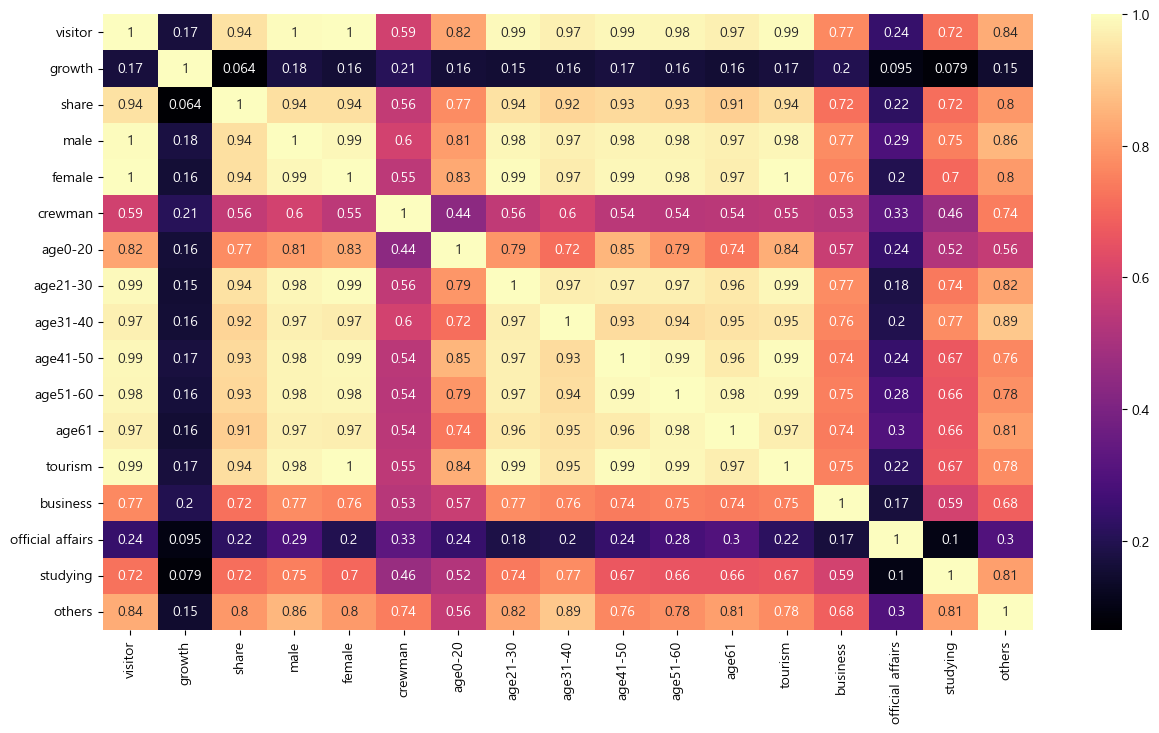

In [21]:
# 히트맵 생성 전 object 컬럼 제외 (날짜, 국가)
excluded_columns = ["date", "nation"]

# 히트맵 생성
plt.figure(figsize=(15, 8))
sns.heatmap(df.drop(columns=excluded_columns).corr(), cmap="magma", annot=True)

<Figure size 1500x800 with 0 Axes>

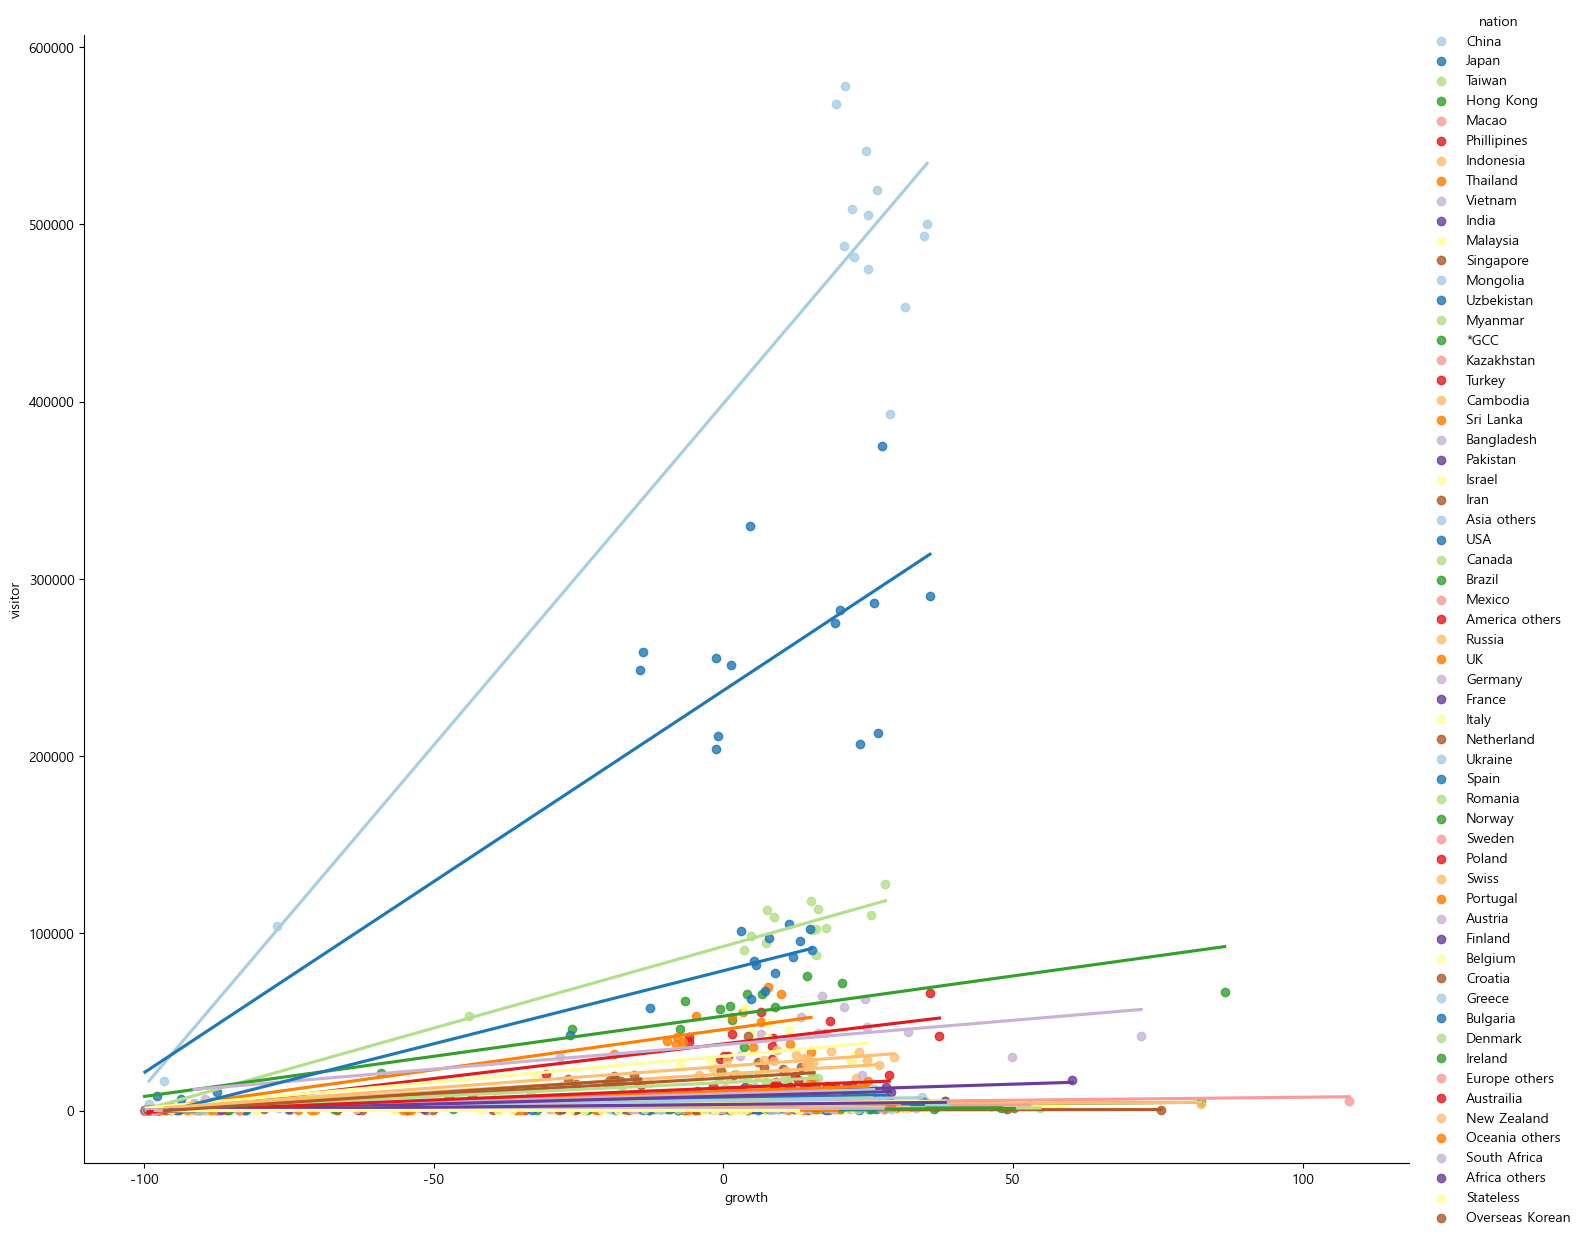

In [22]:
plt.figure(figsize=(15, 8))

sns.lmplot(x="growth", y="visitor", data=df, hue="nation", height=12, aspect=1.2, palette="Paired", ci=None)
plt.show()

In [23]:
# 국가별 모든 방문객을 표시하는 함수
def all_graph(df, x, y, length):
    fig, axes = plt.subplots(1, 1, figsize=(20, 16))
    axes.set_title(y)
    axes.set_ylabel(y)
    axes.set_xlabel(x)
    axes.set_xticklabels(df[x].unique(), rotation=45)
    qualitative_colors = sns.color_palette("Paired", length)
    sns.lineplot(x=x, y=y, ci=None, hue="nation", marker="o", data=df, linewidth=2, palette=qualitative_colors)
    axes.legend(loc="center left", bbox_to_anchor=(1, 0.5))

C:\Users\human-18\AppData\Local\Temp\ipykernel_3448\2954794678.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(df[x].unique(), rotation=45)
C:\Users\human-18\AppData\Local\Temp\ipykernel_3448\2954794678.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=x, y=y, ci=None, hue="nation", marker="o", data=df, linewidth=2, palette=qualitative_colors)


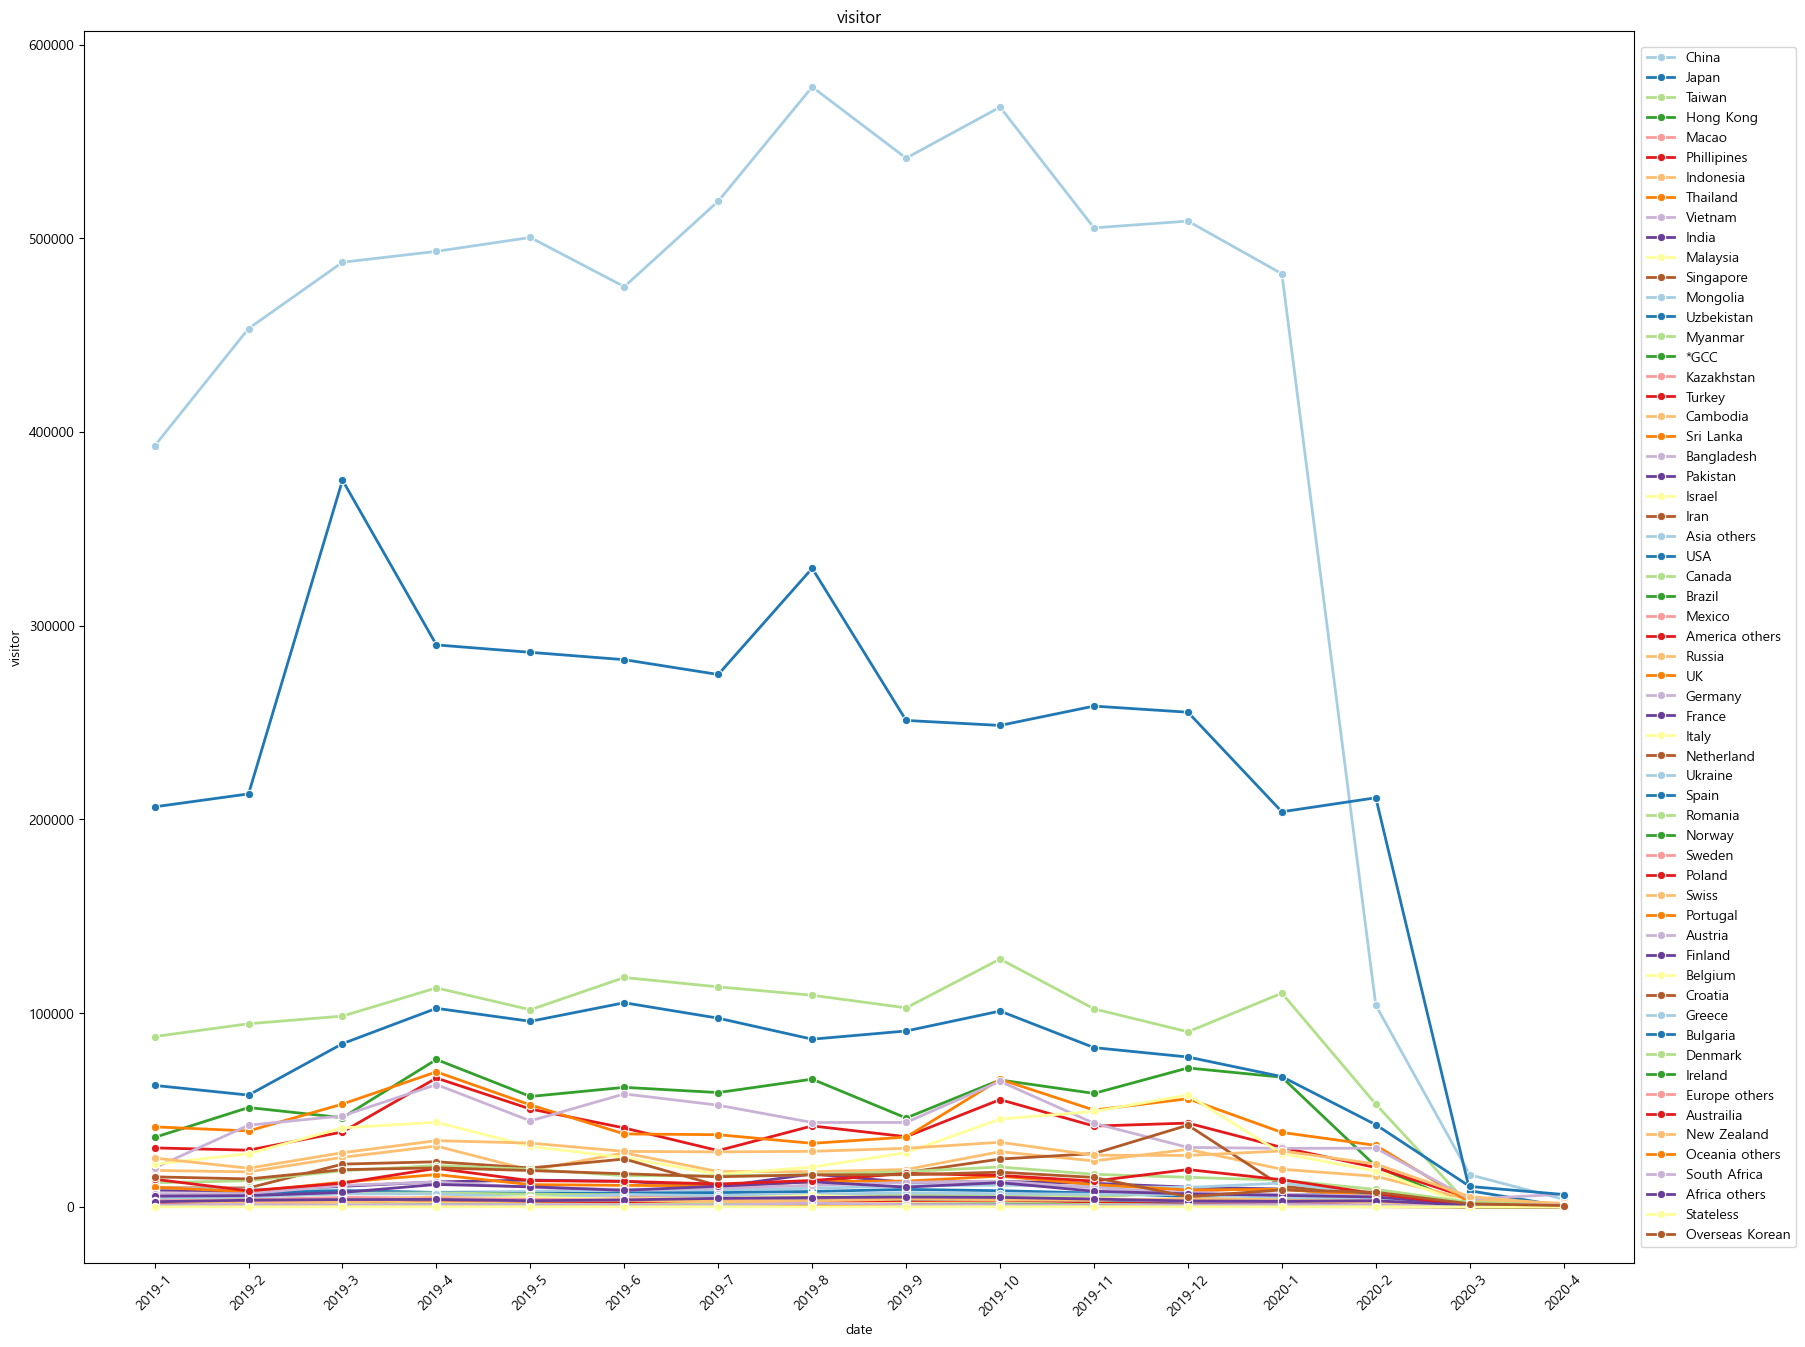

In [24]:
# 국가별 모든 방문객 표시
all_graph(df, "date", "visitor", 60)

In [25]:
# 상위 4개 국가
top_countries = ["China", "Japan", "Taiwan", "USA"]

# 국가 하나에 대한 년도별 방문객 수를 그리는 그래프 함수
def time_visitor_graph(name):
    fig, axes = plt.subplots(1, 1, figsize=(10, 8))
    x = df[df["nation"] == name].date
    y = df[df["nation"] == name].visitor
    axes.set_title(name)
    axes.set_ylabel("The number of visitors")
    axes.set_xlabel("Date")
    axes.set_xticklabels(x, rotation=45)
    axes.plot(x, y, linewidth=3.0)

C:\Users\human-18\AppData\Local\Temp\ipykernel_3448\865778639.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(x, rotation=45)
C:\Users\human-18\AppData\Local\Temp\ipykernel_3448\865778639.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(x, rotation=45)
C:\Users\human-18\AppData\Local\Temp\ipykernel_3448\865778639.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(x, rotation=45)
C:\Users\human-18\AppData\Local\Temp\ipykernel_3448\865778639.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(x, rotation=45)


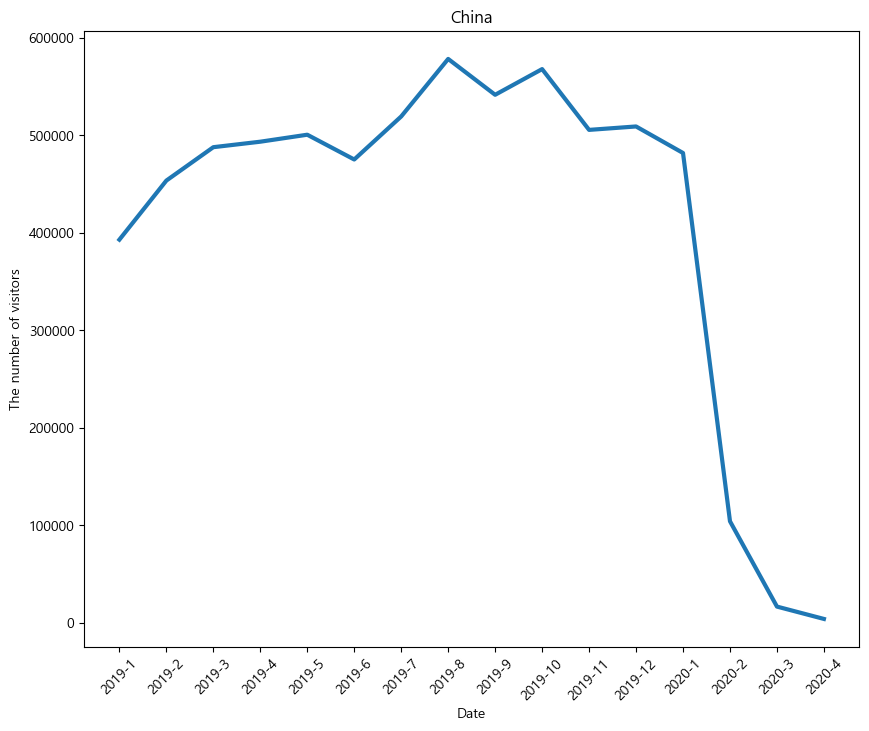

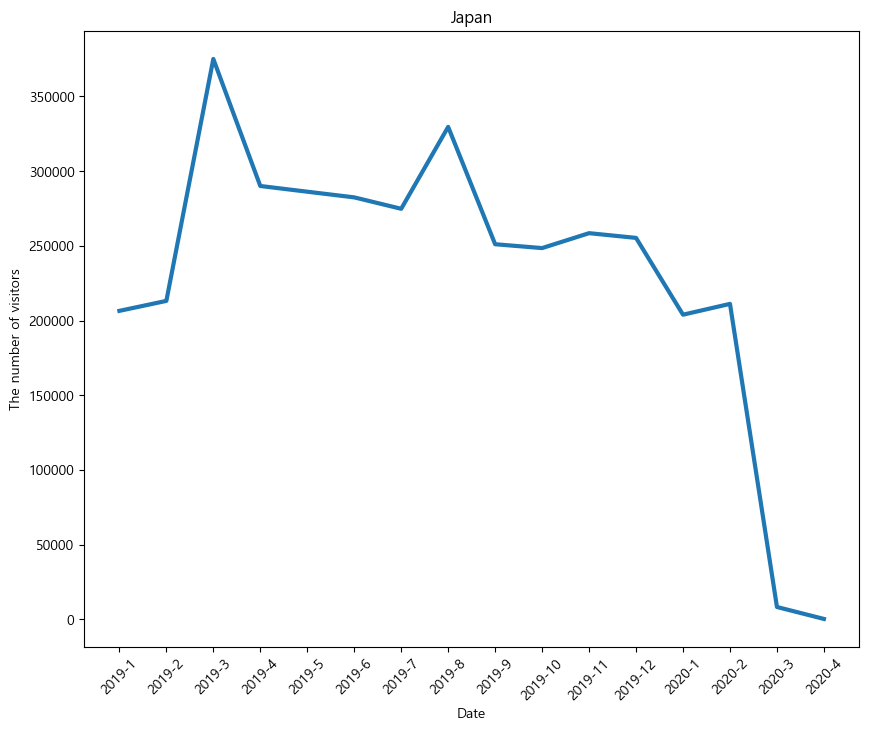

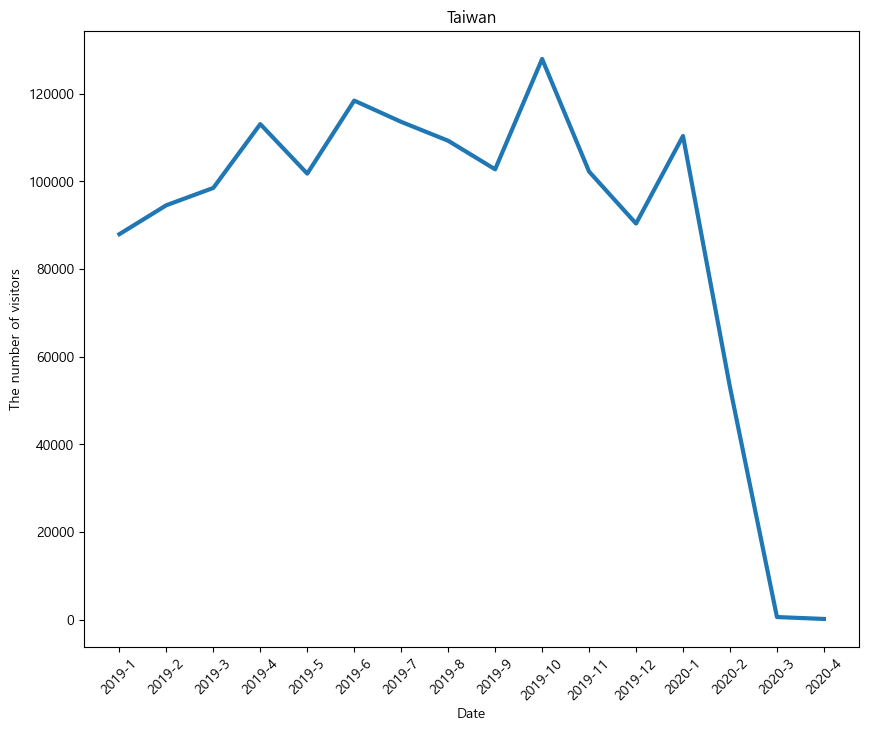

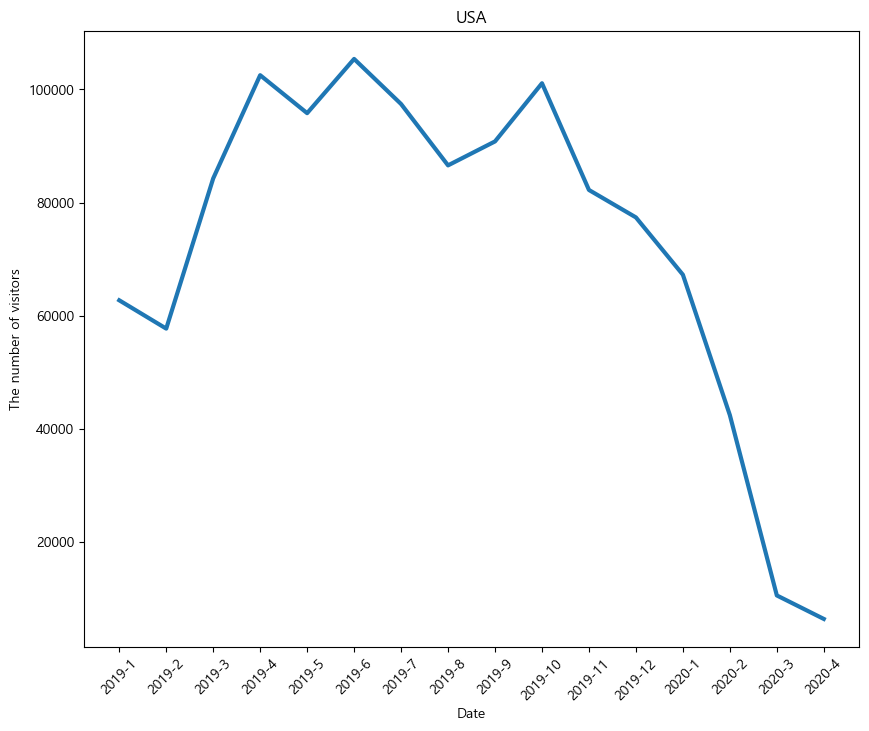

In [26]:
# 상위 4개 국가의 년도별 방문객 수를 그래프로 표시
for country in top_countries:
    time_visitor_graph(country)

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [43]:
# 폰트지정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 부호 깨짐 지정
plt.rcParams['axes.unicode_minus'] = False

pd.options.display.float_format = '{:.2f}'.format

In [29]:
age = pd.read_csv("./dataset/enter_korea/Enter_korea_by_age.csv")
gender = pd.read_csv("./dataset/enter_korea/Enter_korea_by_gender.csv")
purpose = pd.read_csv("./dataset/enter_korea/Enter_korea_by_purpose.csv")

df_merge = gender.merge(age)
df = df_merge.merge(purpose)

In [30]:
df.head()

,date,nation,visitor,growth,share,male,female,crewman,age0-20,age21-30,age31-40,age41-50,age51-60,age61,tourism,business,official affairs,studying,others
0,2019-1,China,392814,28.737870,35.555117,147511,231722,13581,36520,108591,103657,48574,40893,40998,320113,2993,138,8793,60777
1,2019-1,Japan,206526,23.606830,18.693468,75070,129029,2427,18015,57921,34165,39811,33857,20330,198805,2233,127,785,4576
2,2019-1,Taiwan,87954,16.003693,7.961057,30805,56202,947,18888,17927,18595,18862,8169,4566,86393,74,22,180,1285
3,2019-1,Hong Kong,35896,3.533212,3.249086,12172,22729,995,3890,11384,7400,5461,4629,2137,34653,59,2,90,1092
4,2019-1,Macao,2570,-12.376406,0.232621,748,1787,35,223,1013,762,264,181,92,2506,2,0,17,45


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              960 non-null    object 
 1   nation            960 non-null    object 
 2   visitor           960 non-null    int64  
 3   growth            960 non-null    float64
 4   share             960 non-null    float64
 5   male              960 non-null    int64  
 6   female            960 non-null    int64  
 7   crewman           960 non-null    int64  
 8   age0-20           960 non-null    int64  
 9   age21-30          960 non-null    int64  
 10  age31-40          960 non-null    int64  
 11  age41-50          960 non-null    int64  
 12  age51-60          960 non-null    int64  
 13  age61             960 non-null    int64  
 14  tourism           960 non-null    int64  
 15  business          960 non-null    int64  
 16  official affairs  960 non-null    int64  
 1

In [ ]:
# 특성(X)과 타겟(y) 분리
X = df.drop(["date", "nation"], axis=1)
y = df["visitor"]

KeyError: "['China', 'Japan', 'Taiwan', 'Hong Kong', 'Macao', 'Phillipines', 'Indonesia', 'Thailand', 'Vietnam', 'India', 'Malaysia', 'Singapore', 'Mongolia', 'Uzbekistan', 'Myanmar', '*GCC', 'Kazakhstan', 'Turkey', 'Cambodia', 'Sri Lanka', 'Bangladesh', 'Pakistan', 'Israel', 'Iran', 'Asia others', 'USA', 'Canada', 'Brazil', 'Mexico', 'America others', 'Russia', 'UK', 'Germany', 'France', 'Italy', 'Netherland', 'Ukraine', 'Spain', 'Romania', 'Norway', 'Sweden', 'Poland', 'Swiss', 'Portugal', 'Austria', 'Finland', 'Belgium', 'Croatia', 'Greece', 'Bulgaria', 'Denmark', 'Ireland', 'Europe others', 'Austrailia', 'New Zealand', 'Oceania others', 'South Africa', 'Africa others', 'Stateless', 'Overseas Korean', 'China', 'Japan', 'Taiwan', 'Hong Kong', 'Macao', 'Phillipines', 'Indonesia', 'Thailand', 'Vietnam', 'India', 'Malaysia', 'Singapore', 'Mongolia', 'Uzbekistan', 'Myanmar', '*GCC', 'Kazakhstan', 'Turkey', 'Cambodia', 'Sri Lanka', 'Bangladesh', 'Pakistan', 'Israel', 'Iran', 'Asia others', 'USA', 'Canada', 'Brazil', 'Mexico', 'America others', 'Russia', 'UK', 'Germany', 'France', 'Italy', 'Netherland', 'Ukraine', 'Spain', 'Romania', 'Norway', 'Sweden', 'Poland', 'Swiss', 'Portugal', 'Austria', 'Finland', 'Belgium', 'Croatia', 'Greece', 'Bulgaria', 'Denmark', 'Ireland', 'Europe others', 'Austrailia', 'New Zealand', 'Oceania others', 'South Africa', 'Africa others', 'Stateless', 'Overseas Korean', 'China', 'Japan', 'Taiwan', 'Hong Kong', 'Macao', 'Phillipines', 'Indonesia', 'Thailand', 'Vietnam', 'India', 'Malaysia', 'Singapore', 'Mongolia', 'Uzbekistan', 'Myanmar', '*GCC', 'Kazakhstan', 'Turkey', 'Cambodia', 'Sri Lanka', 'Bangladesh', 'Pakistan', 'Israel', 'Iran', 'Asia others', 'USA', 'Canada', 'Brazil', 'Mexico', 'America others', 'Russia', 'UK', 'Germany', 'France', 'Italy', 'Netherland', 'Ukraine', 'Spain', 'Romania', 'Norway', 'Sweden', 'Poland', 'Swiss', 'Portugal', 'Austria', 'Finland', 'Belgium', 'Croatia', 'Greece', 'Bulgaria', 'Denmark', 'Ireland', 'Europe others', 'Austrailia', 'New Zealand', 'Oceania others', 'South Africa', 'Africa others', 'Stateless', 'Overseas Korean', 'China', 'Japan', 'Taiwan', 'Hong Kong', 'Macao', 'Phillipines', 'Indonesia', 'Thailand', 'Vietnam', 'India', 'Malaysia', 'Singapore', 'Mongolia', 'Uzbekistan', 'Myanmar', '*GCC', 'Kazakhstan', 'Turkey', 'Cambodia', 'Sri Lanka', 'Bangladesh', 'Pakistan', 'Israel', 'Iran', 'Asia others', 'USA', 'Canada', 'Brazil', 'Mexico', 'America others', 'Russia', 'UK', 'Germany', 'France', 'Italy', 'Netherland', 'Ukraine', 'Spain', 'Romania', 'Norway', 'Sweden', 'Poland', 'Swiss', 'Portugal', 'Austria', 'Finland', 'Belgium', 'Croatia', 'Greece', 'Bulgaria', 'Denmark', 'Ireland', 'Europe others', 'Austrailia', 'New Zealand', 'Oceania others', 'South Africa', 'Africa others', 'Stateless', 'Overseas Korean', 'China', 'Japan', 'Taiwan', 'Hong Kong', 'Macao', 'Phillipines', 'Indonesia', 'Thailand', 'Vietnam', 'India', 'Malaysia', 'Singapore', 'Mongolia', 'Uzbekistan', 'Myanmar', '*GCC', 'Kazakhstan', 'Turkey', 'Cambodia', 'Sri Lanka', 'Bangladesh', 'Pakistan', 'Israel', 'Iran', 'Asia others', 'USA', 'Canada', 'Brazil', 'Mexico', 'America others', 'Russia', 'UK', 'Germany', 'France', 'Italy', 'Netherland', 'Ukraine', 'Spain', 'Romania', 'Norway', 'Sweden', 'Poland', 'Swiss', 'Portugal', 'Austria', 'Finland', 'Belgium', 'Croatia', 'Greece', 'Bulgaria', 'Denmark', 'Ireland', 'Europe others', 'Austrailia', 'New Zealand', 'Oceania others', 'South Africa', 'Africa others', 'Stateless', 'Overseas Korean', 'China', 'Japan', 'Taiwan', 'Hong Kong', 'Macao', 'Phillipines', 'Indonesia', 'Thailand', 'Vietnam', 'India', 'Malaysia', 'Singapore', 'Mongolia', 'Uzbekistan', 'Myanmar', '*GCC', 'Kazakhstan', 'Turkey', 'Cambodia', 'Sri Lanka', 'Bangladesh', 'Pakistan', 'Israel', 'Iran', 'Asia others', 'USA', 'Canada', 'Brazil', 'Mexico', 'America others', 'Russia', 'UK', 'Germany', 'France', 'Italy', 'Netherland', 'Ukraine', 'Spain', 'Romania', 'Norway', 'Sweden', 'Poland', 'Swiss', 'Portugal', 'Austria', 'Finland', 'Belgium', 'Croatia', 'Greece', 'Bulgaria', 'Denmark', 'Ireland', 'Europe others', 'Austrailia', 'New Zealand', 'Oceania others', 'South Africa', 'Africa others', 'Stateless', 'Overseas Korean', 'China', 'Japan', 'Taiwan', 'Hong Kong', 'Macao', 'Phillipines', 'Indonesia', 'Thailand', 'Vietnam', 'India', 'Malaysia', 'Singapore', 'Mongolia', 'Uzbekistan', 'Myanmar', '*GCC', 'Kazakhstan', 'Turkey', 'Cambodia', 'Sri Lanka', 'Bangladesh', 'Pakistan', 'Israel', 'Iran', 'Asia others', 'USA', 'Canada', 'Brazil', 'Mexico', 'America others', 'Russia', 'UK', 'Germany', 'France', 'Italy', 'Netherland', 'Ukraine', 'Spain', 'Romania', 'Norway', 'Sweden', 'Poland', 'Swiss', 'Portugal', 'Austria', 'Finland', 'Belgium', 'Croatia', 'Greece', 'Bulgaria', 'Denmark', 'Ireland', 'Europe others', 'Austrailia', 'New Zealand', 'Oceania others', 'South Africa', 'Africa others', 'Stateless', 'Overseas Korean', 'China', 'Japan', 'Taiwan', 'Hong Kong', 'Macao', 'Phillipines', 'Indonesia', 'Thailand', 'Vietnam', 'India', 'Malaysia', 'Singapore', 'Mongolia', 'Uzbekistan', 'Myanmar', '*GCC', 'Kazakhstan', 'Turkey', 'Cambodia', 'Sri Lanka', 'Bangladesh', 'Pakistan', 'Israel', 'Iran', 'Asia others', 'USA', 'Canada', 'Brazil', 'Mexico', 'America others', 'Russia', 'UK', 'Germany', 'France', 'Italy', 'Netherland', 'Ukraine', 'Spain', 'Romania', 'Norway', 'Sweden', 'Poland', 'Swiss', 'Portugal', 'Austria', 'Finland', 'Belgium', 'Croatia', 'Greece', 'Bulgaria', 'Denmark', 'Ireland', 'Europe others', 'Austrailia', 'New Zealand', 'Oceania others', 'South Africa', 'Africa others', 'Stateless', 'Overseas Korean', 'China', 'Japan', 'Taiwan', 'Hong Kong', 'Macao', 'Phillipines', 'Indonesia', 'Thailand', 'Vietnam', 'India', 'Malaysia', 'Singapore', 'Mongolia', 'Uzbekistan', 'Myanmar', '*GCC', 'Kazakhstan', 'Turkey', 'Cambodia', 'Sri Lanka', 'Bangladesh', 'Pakistan', 'Israel', 'Iran', 'Asia others', 'USA', 'Canada', 'Brazil', 'Mexico', 'America others', 'Russia', 'UK', 'Germany', 'France', 'Italy', 'Netherland', 'Ukraine', 'Spain', 'Romania', 'Norway', 'Sweden', 'Poland', 'Swiss', 'Portugal', 'Austria', 'Finland', 'Belgium', 'Croatia', 'Greece', 'Bulgaria', 'Denmark', 'Ireland', 'Europe others', 'Austrailia', 'New Zealand', 'Oceania others', 'South Africa', 'Africa others', 'Stateless', 'Overseas Korean', 'China', 'Japan', 'Taiwan', 'Hong Kong', 'Macao', 'Phillipines', 'Indonesia', 'Thailand', 'Vietnam', 'India', 'Malaysia', 'Singapore', 'Mongolia', 'Uzbekistan', 'Myanmar', '*GCC', 'Kazakhstan', 'Turkey', 'Cambodia', 'Sri Lanka', 'Bangladesh', 'Pakistan', 'Israel', 'Iran', 'Asia others', 'USA', 'Canada', 'Brazil', 'Mexico', 'America others', 'Russia', 'UK', 'Germany', 'France', 'Italy', 'Netherland', 'Ukraine', 'Spain', 'Romania', 'Norway', 'Sweden', 'Poland', 'Swiss', 'Portugal', 'Austria', 'Finland', 'Belgium', 'Croatia', 'Greece', 'Bulgaria', 'Denmark', 'Ireland', 'Europe others', 'Austrailia', 'New Zealand', 'Oceania others', 'South Africa', 'Africa others', 'Stateless', 'Overseas Korean', 'China', 'Japan', 'Taiwan', 'Hong Kong', 'Macao', 'Phillipines', 'Indonesia', 'Thailand', 'Vietnam', 'India', 'Malaysia', 'Singapore', 'Mongolia', 'Uzbekistan', 'Myanmar', '*GCC', 'Kazakhstan', 'Turkey', 'Cambodia', 'Sri Lanka', 'Bangladesh', 'Pakistan', 'Israel', 'Iran', 'Asia others', 'USA', 'Canada', 'Brazil', 'Mexico', 'America others', 'Russia', 'UK', 'Germany', 'France', 'Italy', 'Netherland', 'Ukraine', 'Spain', 'Romania', 'Norway', 'Sweden', 'Poland', 'Swiss', 'Portugal', 'Austria', 'Finland', 'Belgium', 'Croatia', 'Greece', 'Bulgaria', 'Denmark', 'Ireland', 'Europe others', 'Austrailia', 'New Zealand', 'Oceania others', 'South Africa', 'Africa others', 'Stateless', 'Overseas Korean', 'China', 'Japan', 'Taiwan', 'Hong Kong', 'Macao', 'Phillipines', 'Indonesia', 'Thailand', 'Vietnam', 'India', 'Malaysia', 'Singapore', 'Mongolia', 'Uzbekistan', 'Myanmar', '*GCC', 'Kazakhstan', 'Turkey', 'Cambodia', 'Sri Lanka', 'Bangladesh', 'Pakistan', 'Israel', 'Iran', 'Asia others', 'USA', 'Canada', 'Brazil', 'Mexico', 'America others', 'Russia', 'UK', 'Germany', 'France', 'Italy', 'Netherland', 'Ukraine', 'Spain', 'Romania', 'Norway', 'Sweden', 'Poland', 'Swiss', 'Portugal', 'Austria', 'Finland', 'Belgium', 'Croatia', 'Greece', 'Bulgaria', 'Denmark', 'Ireland', 'Europe others', 'Austrailia', 'New Zealand', 'Oceania others', 'South Africa', 'Africa others', 'Stateless', 'Overseas Korean', 'China', 'Japan', 'Taiwan', 'Hong Kong', 'Macao', 'Phillipines', 'Indonesia', 'Thailand', 'Vietnam', 'India', 'Malaysia', 'Singapore', 'Mongolia', 'Uzbekistan', 'Myanmar', '*GCC', 'Kazakhstan', 'Turkey', 'Cambodia', 'Sri Lanka', 'Bangladesh', 'Pakistan', 'Israel', 'Iran', 'Asia others', 'USA', 'Canada', 'Brazil', 'Mexico', 'America others', 'Russia', 'UK', 'Germany', 'France', 'Italy', 'Netherland', 'Ukraine', 'Spain', 'Romania', 'Norway', 'Sweden', 'Poland', 'Swiss', 'Portugal', 'Austria', 'Finland', 'Belgium', 'Croatia', 'Greece', 'Bulgaria', 'Denmark', 'Ireland', 'Europe others', 'Austrailia', 'New Zealand', 'Oceania others', 'South Africa', 'Africa others', 'Stateless', 'Overseas Korean', 'China', 'Japan', 'Taiwan', 'Hong Kong', 'Macao', 'Phillipines', 'Indonesia', 'Thailand', 'Vietnam', 'India', 'Malaysia', 'Singapore', 'Mongolia', 'Uzbekistan', 'Myanmar', '*GCC', 'Kazakhstan', 'Turkey', 'Cambodia', 'Sri Lanka', 'Bangladesh', 'Pakistan', 'Israel', 'Iran', 'Asia others', 'USA', 'Canada', 'Brazil', 'Mexico', 'America others', 'Russia', 'UK', 'Germany', 'France', 'Italy', 'Netherland', 'Ukraine', 'Spain', 'Romania', 'Norway', 'Sweden', 'Poland', 'Swiss', 'Portugal', 'Austria', 'Finland', 'Belgium', 'Croatia', 'Greece', 'Bulgaria', 'Denmark', 'Ireland', 'Europe others', 'Austrailia', 'New Zealand', 'Oceania others', 'South Africa', 'Africa others', 'Stateless', 'Overseas Korean', 'China', 'Japan', 'Taiwan', 'Hong Kong', 'Macao', 'Phillipines', 'Indonesia', 'Thailand', 'Vietnam', 'India', 'Malaysia', 'Singapore', 'Mongolia', 'Uzbekistan', 'Myanmar', '*GCC', 'Kazakhstan', 'Turkey', 'Cambodia', 'Sri Lanka', 'Bangladesh', 'Pakistan', 'Israel', 'Iran', 'Asia others', 'USA', 'Canada', 'Brazil', 'Mexico', 'America others', 'Russia', 'UK', 'Germany', 'France', 'Italy', 'Netherland', 'Ukraine', 'Spain', 'Romania', 'Norway', 'Sweden', 'Poland', 'Swiss', 'Portugal', 'Austria', 'Finland', 'Belgium', 'Croatia', 'Greece', 'Bulgaria', 'Denmark', 'Ireland', 'Europe others', 'Austrailia', 'New Zealand', 'Oceania others', 'South Africa', 'Africa others', 'Stateless', 'Overseas Korean', 'China', 'Japan', 'Taiwan', 'Hong Kong', 'Macao', 'Phillipines', 'Indonesia', 'Thailand', 'Vietnam', 'India', 'Malaysia', 'Singapore', 'Mongolia', 'Uzbekistan', 'Myanmar', '*GCC', 'Kazakhstan', 'Turkey', 'Cambodia', 'Sri Lanka', 'Bangladesh', 'Pakistan', 'Israel', 'Iran', 'Asia others', 'USA', 'Canada', 'Brazil', 'Mexico', 'America others', 'Russia', 'UK', 'Germany', 'France', 'Italy', 'Netherland', 'Ukraine', 'Spain', 'Romania', 'Norway', 'Sweden', 'Poland', 'Swiss', 'Portugal', 'Austria', 'Finland', 'Belgium', 'Croatia', 'Greece', 'Bulgaria', 'Denmark', 'Ireland', 'Europe others', 'Austrailia', 'New Zealand', 'Oceania others', 'South Africa', 'Africa others', 'Stateless', 'Overseas Korean'] not found in axis"

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# 선형회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [35]:
# 테스트 세트에 대한 예측
y_pred = model.predict(X_test)

In [36]:
# 모델 성능 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [37]:
# 결과 출력
print('모델 성능 평가 결과:')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R2 Score: {r2:.4f}')

모델 성능 평가 결과:
MSE: 0.0000
RMSE: 0.0000
R2 Score: 1.0000


In [45]:
# 각 특성의 계수(가중치) 출력
feature_coefficients = pd.DataFrame({
    '특성': X.columns,
    '계수': model.coef_
}).sort_values(by='계수', ascending=False)
print('\n특성별 가중치:')
print(feature_coefficients)


특성별 가중치:
                  특성   계수
0            visitor 0.63
5            crewman 0.25
4             female 0.19
3               male 0.19
14  official affairs 0.13
15          studying 0.12
16            others 0.12
13          business 0.12
12           tourism 0.12
9           age41-50 0.06
11             age61 0.06
8           age31-40 0.06
7           age21-30 0.06
6            age0-20 0.06
10          age51-60 0.06
2              share 0.00
1             growth 0.00


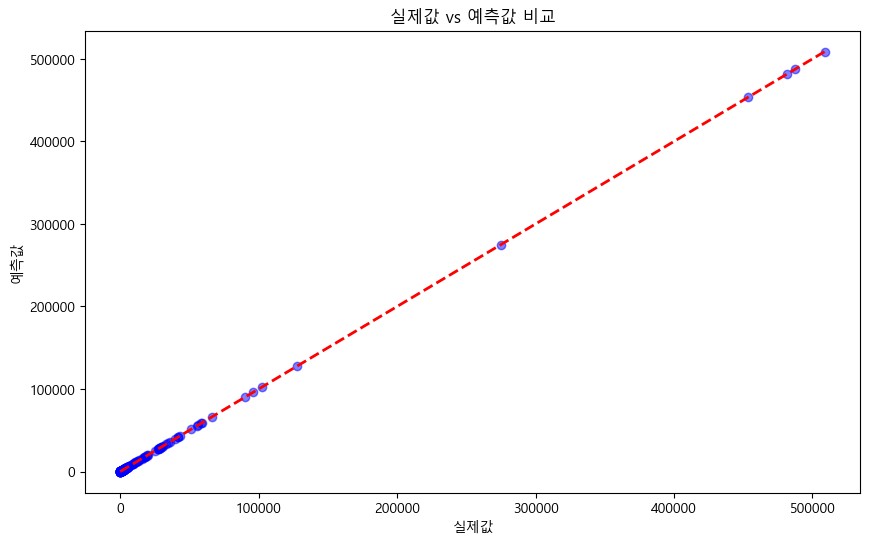

In [39]:
# 실제값과 예측값 비교 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('실제값')
plt.ylabel('예측값')
plt.title('실제값 vs 예측값 비교')
plt.show()